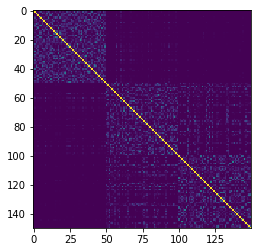

In [11]:
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from rerf.urerf import UnsupervisedRandomForest
from sklearn.cluster import AgglomerativeClustering

iris = datasets.load_iris()
X1 = iris.data
X = iris.data + (np.random.rand(150,4))
#print(X.shape)
clf = UnsupervisedRandomForest(feature_combinations='auto', max_depth=None,
                         max_features='auto', min_samples_split='auto',
                         n_estimators=1000, n_jobs=None,
                         projection_matrix='RerF', random_state=0)
clf.fit(X)

sim_mat = clf.transform()
plt.imshow(sim_mat)

In [12]:
from sklearn.decomposition import PCA
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

pca = PCA(n_components= 2)
principalComponents = pca.fit_transform(sim_mat)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

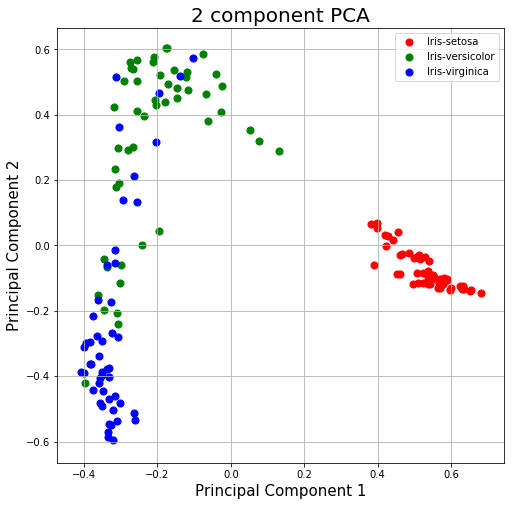

In [13]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [14]:
#Varificatio of the result
pca.explained_variance_ratio_

array([0.1059556 , 0.08122292])

In [18]:
cluster = AgglomerativeClustering(n_clusters=3, 
                                  memory=None, 
                                  connectivity=None)
predict_labels = cluster.fit_predict(principalDf)
score = adjusted_rand_score(iris.target, predict_labels)
score

0.6757362582358094

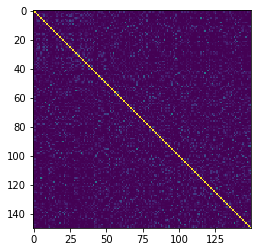

In [20]:
#2
from sklearn.datasets.samples_generator import make_blobs
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from rerf.urerf import UnsupervisedRandomForest
from sklearn.cluster import AgglomerativeClustering

iris = datasets.load_iris()
X1 = iris.data
X = iris.data + 10*(np.random.rand(150,4))
#print(X.shape)
clf = UnsupervisedRandomForest(feature_combinations='auto', max_depth=None,
                         max_features='auto', min_samples_split='auto',
                         n_estimators=1000, n_jobs=None,
                         projection_matrix='RerF', random_state=0)
clf.fit(X)

sim_mat = clf.transform()
plt.imshow(sim_mat)

In [21]:
from sklearn.decomposition import PCA
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

pca = PCA(n_components= 2)
principalComponents = pca.fit_transform(sim_mat)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

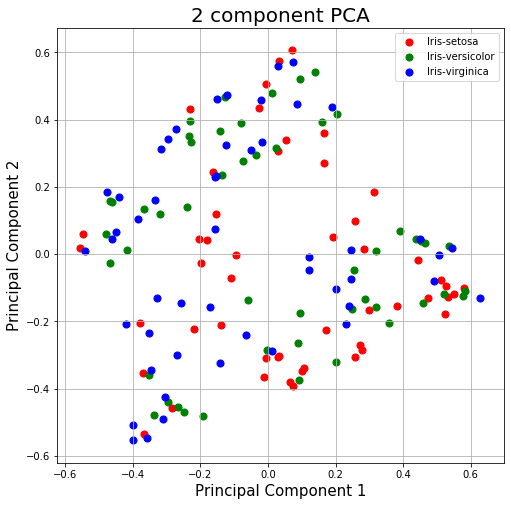

In [22]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [23]:
#Varificatio of the result
pca.explained_variance_ratio_

array([0.07383412, 0.06657306])

In [28]:
cluster = AgglomerativeClustering(n_clusters=3, 
                                  memory=None, 
                                  connectivity=None)
predict_labels = cluster.fit_predict(principalDf)
score = adjusted_rand_score(iris.target, predict_labels)
score

0.014712542976930667

In [29]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])